In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image

In [82]:
%run SharedFunctions.ipynb

Učitavaju se tabele sa izračunatim metrikama iz prethodnih sveski

In [83]:
report1 = pd.read_csv('data/report1.csv')
report2 = pd.read_csv('data/report2.csv')
report3 = pd.read_csv('data/report3.csv')

In [84]:
report1.rename(columns={'Unnamed: 0': 'metrics'}, inplace=True)
report2.rename(columns={'Unnamed: 0': 'metrics'}, inplace=True)
report3.rename(columns={'Unnamed: 0': 'metrics'}, inplace=True)

In [85]:
# prvi model: tezine
report1

,metrics,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,precision,0.96,0.30,0.78,0.44,0.7,0.43
1,recall,0.96,0.66,0.79,0.47,0.7,0.50
2,f1,0.96,0.41,0.78,0.45,0.7,0.46


In [86]:
# drugi model: augmentacija
report2

,metrics,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,precision,0.96,0.41,0.80,0.39,0.69,0.48
1,recall,0.99,0.47,0.76,0.58,0.73,0.53
2,f1,0.97,0.44,0.78,0.47,0.71,0.50


In [87]:
# treci model: undersample
report3

,metrics,severe_toxic,obscene,threat,insult,identity_hate
0,precision,0.31,0.89,0.42,0.79,0.63
1,recall,0.60,0.87,0.47,0.88,0.56
2,f1,0.41,0.88,0.44,0.83,0.59


Prikaz matrica konfuzije za svaki od modela:

Model 1:


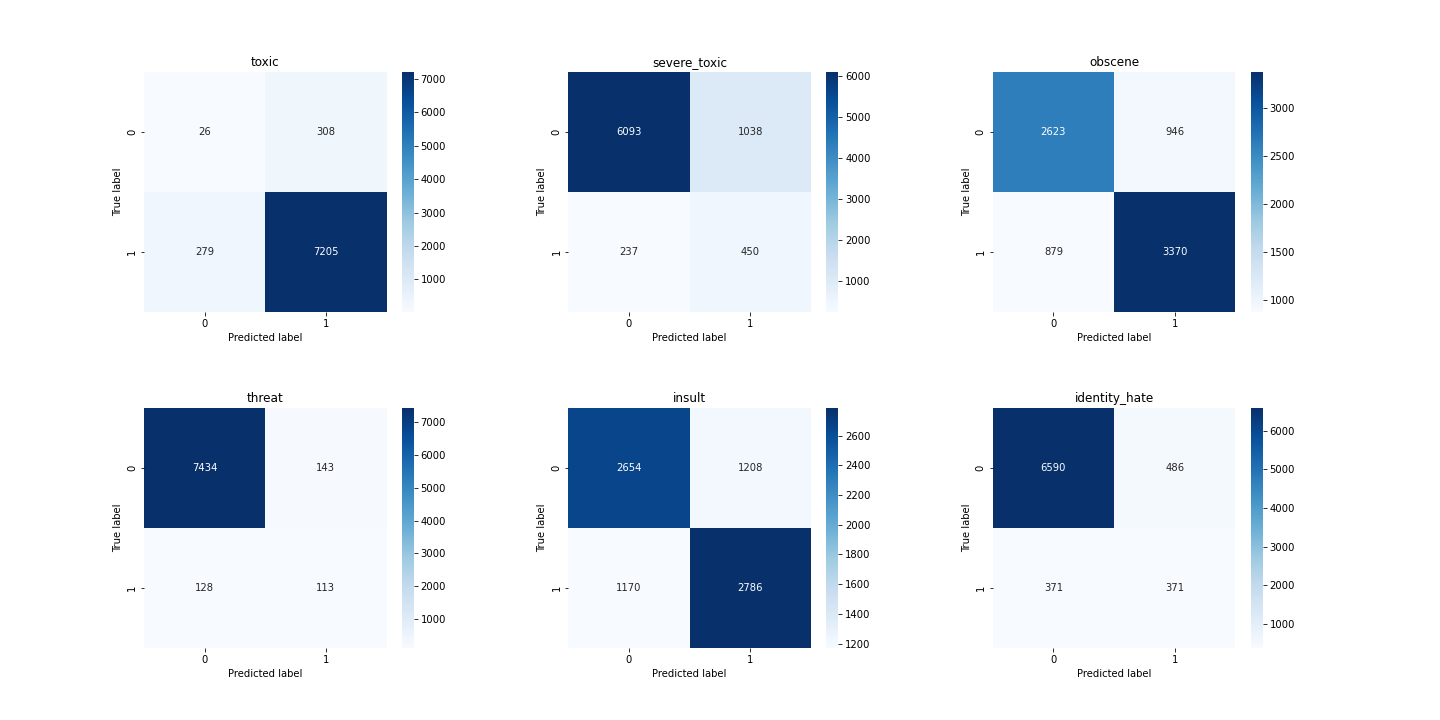

In [88]:
print('Model 1:')
Image('plots and images/confusion_matrix_multi.png')

Model 2:


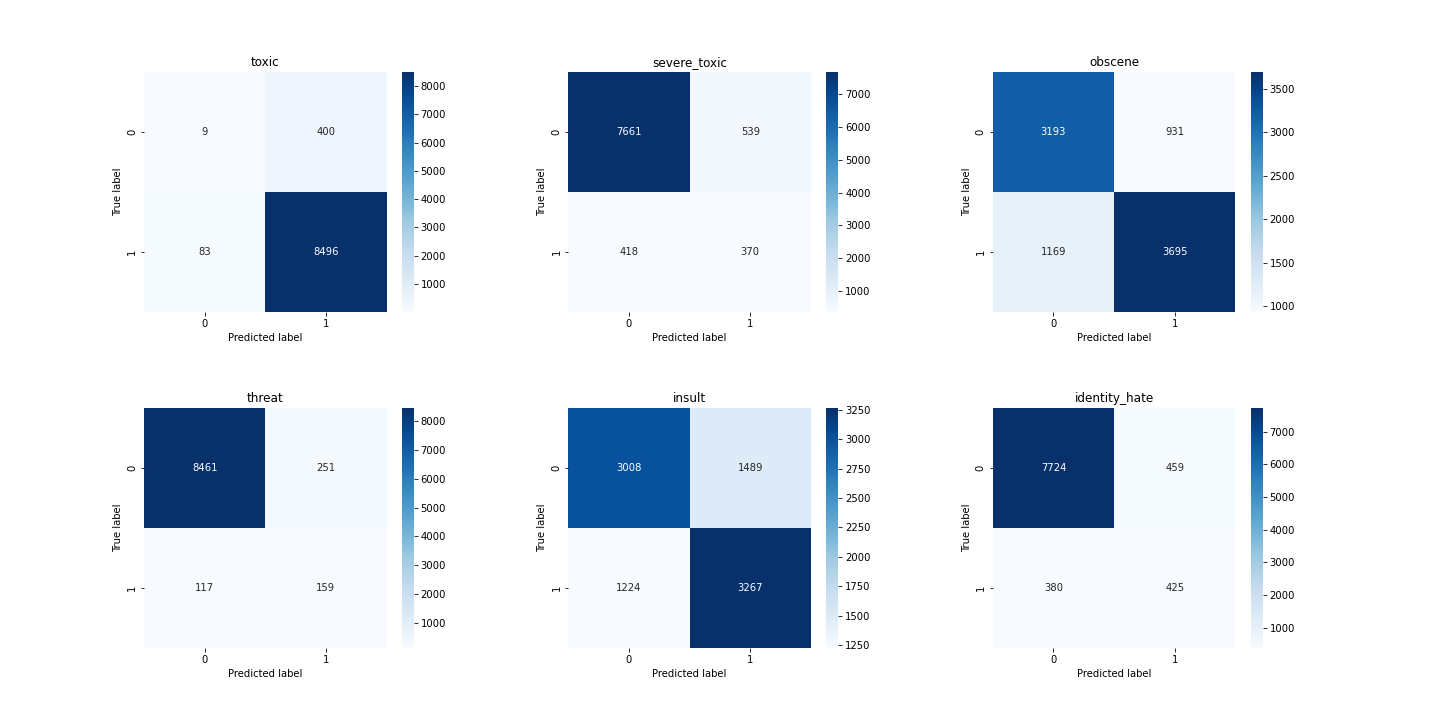

In [89]:
print('Model 2:')
Image('plots and images/confusion_matrix_multi_aug.png')

Model 3:


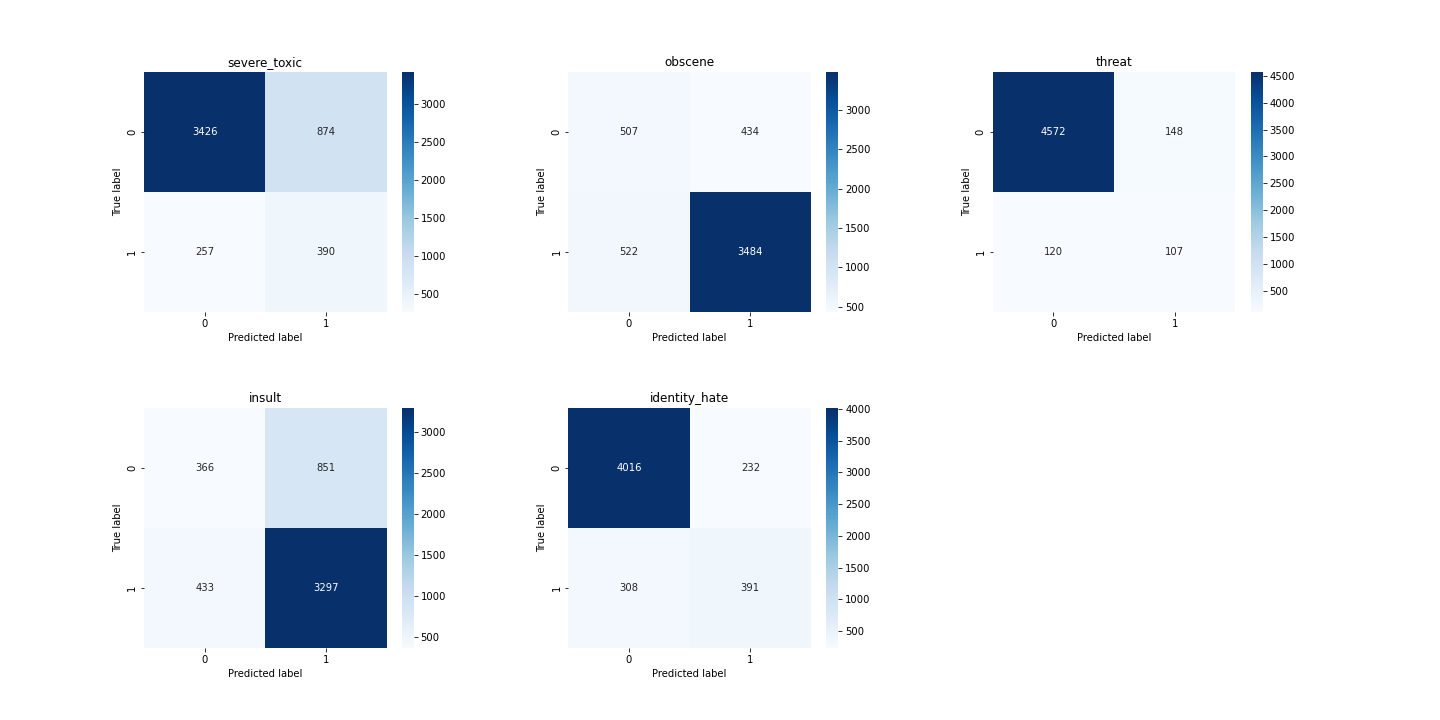

In [90]:
print('Model 3:')
Image('plots and images/confusion_matrix_multi_without_toxic.png')


Metrika koja je bila najvažnija je odziv - što manji broj lažno negativnih. Lažno pozitivne su manje važne jer se klase svakako manje više preklapaju, pa i ako model svrsta komentar u još neku klasu pored tačnih nije veliki problem.

Uporedićemo modele za svaku klasu pojedinačno: 

In [91]:
models_toxic = [report1['toxic'], report2['toxic']]
models_severe = [report1['severe_toxic'], report2['severe_toxic'], report3['severe_toxic']]
models_obscene = [report1['obscene'], report2['obscene'], report3['obscene']]
models_threat = [report1['threat'], report2['threat'], report3['threat']]
models_insult = [report1['insult'], report2['insult'], report3['insult']]
models_identity = [report1['identity_hate'], report2['identity_hate'], report3['identity_hate']]

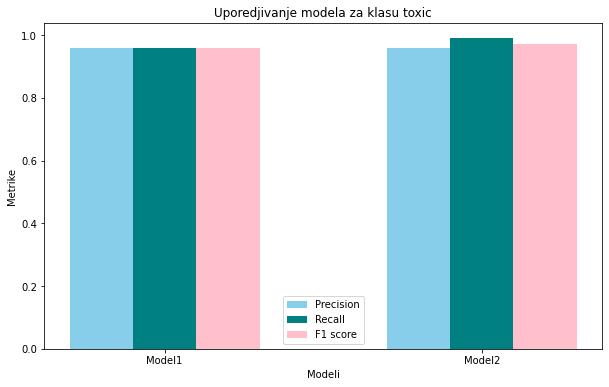

In [92]:
plot_metrics(models_toxic, 'toxic')

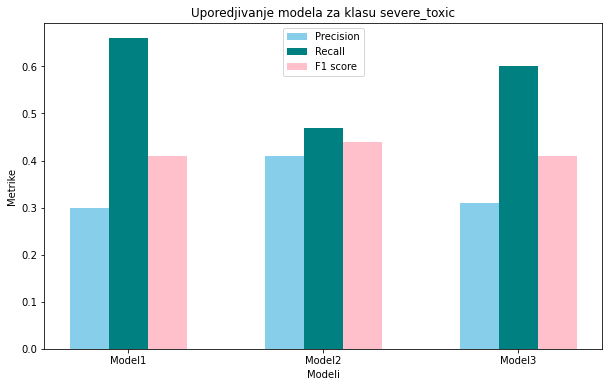

In [93]:
plot_metrics(models_severe, 'severe_toxic')

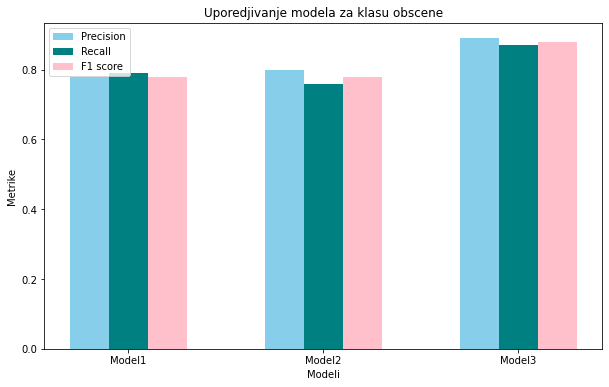

In [94]:
plot_metrics(models_obscene, 'obscene')

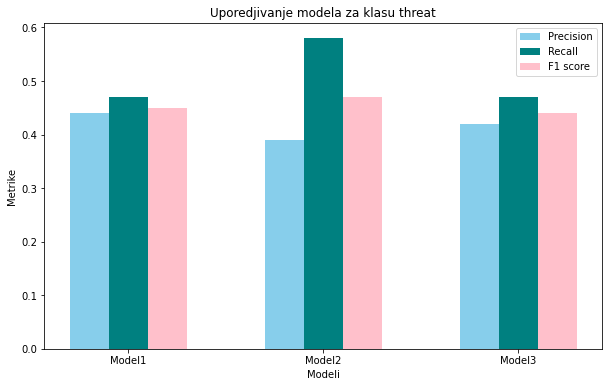

In [95]:
plot_metrics(models_threat, 'threat')

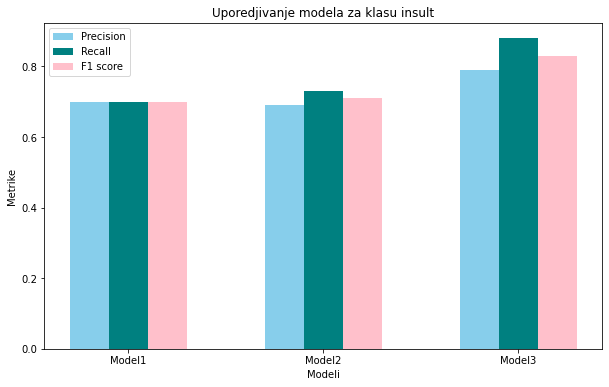

In [96]:
plot_metrics(models_insult, 'insult')

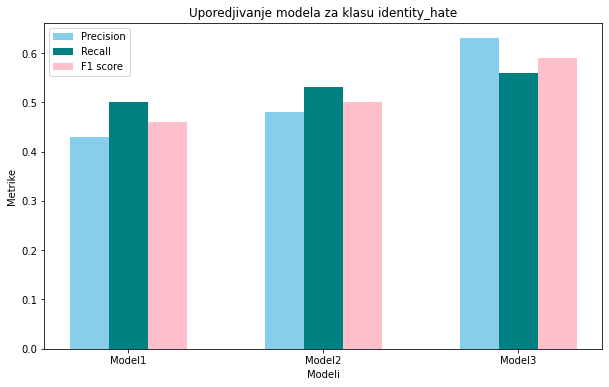

In [97]:
plot_metrics(models_identity, 'identity_hate')

### Zaključak
    
- multilabel modeli ne klasifikuju dobro, posebno na manje zastupljenim klasama
- izbacivanje većinske klase toxic dovodi do većeg odziva kod manjinskih klasa
- augmentacija je poboljšala odziv jedino za klasu threat 
    - poboljšanje: koristiti druge augmentatatore i veće količine augmentovanih podataka
- klase insult, obscene i identity_hate najbolje se pogađaju kada se izbaci klasa toxic (model3)

- teško je zaključiti kako se toksične klase preklapaju i po čemu se razlikuju, samim tim teško je tačno odrediti koje labele i koliko ih dodeliti određenom uvredljivom komentaru